<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [32]:
import numpy as np
import pandas as pd 
from functools import reduce
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# For extended preview
pd.set_option('display.max_rows', 500)

In [33]:
wellbeing_lifestyle = pd.read_csv("../data/Wellbeing_and_lifestyle_data_Kaggle.csv")
play_w = pd.read_csv("../data/play_w.csv", header= 1)
play_usa = pd.read_csv("../data/play_usa.csv", header=1)
drill_w = pd.read_csv("../data/drill_w.csv", header=1)
drill_usa = pd.read_csv("../data/drill_usa.csv", header=1)
repair_w = pd.read_csv("../data/repair_w.csv", header=1)
repair_usa = pd.read_csv("../data/repair_usa.csv", header=1)
diy_w = pd.read_csv("../data/diy_w.csv", header=1)
diy_usa = pd.read_csv("../data/diy_usa.csv", header=1)
cook_usa = pd.read_csv("../data/cook_usa.csv", header=1)
cook_w = pd.read_csv("../data/cook_w.csv", header=1)
sew_usa = pd.read_csv("../data/sew_usa.csv", header=1)
sew_w = pd.read_csv("../data/sew_w.csv", header=1)
cut_hair_w = pd.read_csv("../data/cut_hair_w.csv", header=1)
cut_hair_usa = pd.read_csv("../data/cut_hair_usa.csv", header=1)
plant_seeds_usa = pd.read_csv("../data/plant_seeds_usa.csv", header=1)
plant_seeds_w = pd.read_csv("../data/plant_seeds_w.csv", header=1)


In [34]:
# Joining Google Trends Data on the date column (date range is 1.1.2018 - 21.04.2021)

list_of_dfs = [play_w, play_usa, drill_w, drill_usa, repair_w, repair_usa, diy_w, diy_usa,
               cook_usa, cook_w, sew_usa, sew_w, cut_hair_usa, cut_hair_w, plant_seeds_usa, plant_seeds_w]

w_dfs = [play_w, drill_w, repair_w, diy_w, cook_w, sew_w, cut_hair_w, plant_seeds_w]

usa_dfs = [play_usa, drill_usa, repair_usa, diy_usa, cook_usa, sew_usa, cut_hair_usa, plant_seeds_usa]

df_all = reduce(lambda df1, df2: pd.merge(
    df1, df2, on='Week', how='inner'), list_of_dfs)

df_w = reduce(lambda df1, df2: pd.merge(
    df1, df2, on='Week', how='inner'), w_dfs)

df_usa = reduce(lambda df1, df2: pd.merge(
    df1, df2, on='Week', how='inner'), usa_dfs)

In [35]:
def Clean_dates(date):
    # Search for space in the date followed by
    # any characters repeated any number of times
    if re.search('\s\d*:\d*', date):
  
        # Extract the position of beginning of pattern
        pos = re.search('\s\d*:\d*', date).start()
  
        # return the date
        return date[:pos]
  
    else:
        # if clean up needed return the same name
        return date
          
# Updated the date
wellbeing_lifestyle['Timestamp'] = wellbeing_lifestyle['Timestamp'].apply(Clean_dates)

In [36]:
# Changing timestamp dtype to datetime
df_all['Week'] = pd.to_datetime(df_all['Week'])

# Creating week number column
df_all['week_number'] = df_all['Week'].dt.isocalendar(
).week

# Creating year column
df_all['year'] = df_all['Week'].dt.isocalendar(
).year

df_all['Year-Week'] = df_all["year"].astype(str) + "-" + df_all["week_number"].astype(str)

df_all = df_all[['Week',
                 'week_number',
                 'year',
                 'Year-Week',
                 'How to play: (Worldwide)',
                 'How to play: (United States)',
                 'How to drill: (Worldwide)',
                 'How to drill: (United States)',
                 'How to repair: (Worldwide)',
                 'How to repair: (United States)',
                 'diy: (Worldwide)',
                 'diy: (United States)',
                 'How to cook: (United States)',
                 'How to cook: (Worldwide)',
                 'How to sew: (United States)',
                 'How to sew: (Worldwide)',
                 'How to cut my own hair: (United States)',
                 'How to cut my own hair: (Worldwide)',
                 'how to plant seeds: (United States)',
                 'how to plant seeds: (Worldwide)']]

###  USA  ###
# Changing timestamp dtype to datetime
df_usa['Week'] = pd.to_datetime(df_usa['Week'])

# Creating week number column
df_usa['week_number'] = df_usa['Week'].dt.isocalendar(
).week

# Creating year column
df_usa['year'] = df_usa['Week'].dt.isocalendar(
).year

df_usa['Year-Week'] = df_usa["year"].astype(str) + "-" + df_all["week_number"].astype(str)

df_usa = df_usa[['Week',
                 'week_number',
                 'year',
                 'Year-Week',
                 'How to play: (United States)',
                 'How to drill: (United States)',
                 'How to repair: (United States)',
                 'diy: (United States)',
                 'How to cook: (United States)',
                 'How to sew: (United States)',
                 'How to cut my own hair: (United States)',
                 'how to plant seeds: (United States)']]


###  Worldwide  ###
# Changing timestamp dtype to datetime
df_w['Week'] = pd.to_datetime(df_w['Week'])

# Creating week number column
df_w['week_number'] = df_w['Week'].dt.isocalendar(
).week

# Creating year column
df_w['year'] = df_w['Week'].dt.isocalendar(
).year

df_w['Year-Week'] = df_w["year"].astype(str) + "-" + df_w["week_number"].astype(str)

df_w = df_w[['Week',
                 'week_number',
                 'year',
                 'Year-Week',
                 'How to play: (Worldwide)',
                 'How to drill: (Worldwide)',
                 'How to repair: (Worldwide)',
                 'diy: (Worldwide)',
                 'How to cook: (Worldwide)',
                 'How to sew: (Worldwide)',
                 'How to cut my own hair: (Worldwide)',
                 'how to plant seeds: (Worldwide)']]


In [37]:
# Changing timestamp dtype to datetime 
wellbeing_lifestyle['Timestamp'] = pd.to_datetime(
    wellbeing_lifestyle['Timestamp'])

# Creating week number column
wellbeing_lifestyle['week_number'] = wellbeing_lifestyle['Timestamp'].dt.isocalendar(
).week

# Creating year column
wellbeing_lifestyle['year'] = wellbeing_lifestyle['Timestamp'].dt.isocalendar(
).year

wellbeing_lifestyle['Year-Week'] = wellbeing_lifestyle["year"].astype(str) + "-" + wellbeing_lifestyle["week_number"].astype(str)

# Fixing a wrong value in DAILY_STRESS and changing from object to numeric calues
wellbeing_lifestyle.loc[wellbeing_lifestyle["DAILY_STRESS"] == "1/1/00", "DAILY_STRESS"] = 1
wellbeing_lifestyle["DAILY_STRESS"]=wellbeing_lifestyle["DAILY_STRESS"].apply(pd.to_numeric, errors='coerce')


#re-arranging the DF
wellbeing_lifestyle = wellbeing_lifestyle[['Timestamp',
                                           'year',
                                           'week_number',
                                           'Year-Week',
                                           'FRUITS_VEGGIES',
                                           'DAILY_STRESS',
                                           'PLACES_VISITED',
                                           'CORE_CIRCLE',
                                           'SUPPORTING_OTHERS',
                                           'SOCIAL_NETWORK',
                                           'ACHIEVEMENT',
                                           'DONATION',
                                           'BMI_RANGE',
                                           'TODO_COMPLETED',
                                           'FLOW',
                                           'DAILY_STEPS',
                                           'LIVE_VISION',
                                           'SLEEP_HOURS',
                                           'LOST_VACATION',
                                           'DAILY_SHOUTING',
                                           'SUFFICIENT_INCOME',
                                           'PERSONAL_AWARDS',
                                           'TIME_FOR_PASSION',
                                           'WEEKLY_MEDITATION',
                                           'AGE',
                                           'GENDER',
                                           'WORK_LIFE_BALANCE_SCORE']]


In [38]:
wellbeing_lifestyle

,Timestamp,year,week_number,Year-Week,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,2015,28,2015-28,3,2,2,5,0,5,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07,2015,28,2015-28,2,3,4,3,8,10,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07,2015,28,2015-28,2,3,3,4,4,10,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,2015-07-07,2015,28,2015-28,3,3,10,3,10,7,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,2015-07-07,2015,28,2015-28,5,1,3,3,10,4,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,2021-03-14,2021,10,2021-10,3,3,0,4,0,10,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,2021-03-14,2021,10,2021-10,3,3,6,8,7,4,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,2021-03-14,2021,10,2021-10,4,3,0,10,10,8,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,2021-03-14,2021,10,2021-10,1,1,10,8,2,7,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [39]:
# Group by Year-Week

wellbeing_lifestyle_grouped = wellbeing_lifestyle.groupby(by='Year-Week')[['FRUITS_VEGGIES',
                                                                           'DAILY_STRESS',
                                                                           'PLACES_VISITED',
                                                                           'CORE_CIRCLE',
                                                                           'SUPPORTING_OTHERS',
                                                                           'SOCIAL_NETWORK',
                                                                           'ACHIEVEMENT',
                                                                           'DONATION',
                                                                           'BMI_RANGE',
                                                                           'TODO_COMPLETED',
                                                                           'FLOW',
                                                                           'DAILY_STEPS',
                                                                           'LIVE_VISION',
                                                                           'SLEEP_HOURS',
                                                                           'LOST_VACATION',
                                                                           'DAILY_SHOUTING',
                                                                           'SUFFICIENT_INCOME',
                                                                           'PERSONAL_AWARDS',
                                                                           'TIME_FOR_PASSION',
                                                                           'WEEKLY_MEDITATION',
                                                                           'WORK_LIFE_BALANCE_SCORE']].mean().round(2)

# Group by Year-Week / Filtered by Gender

wellbeing_lifestyle_grouped_male = wellbeing_lifestyle[wellbeing_lifestyle["GENDER"] == 'Male'].groupby(
    by='Year-Week')[['FRUITS_VEGGIES',
                     'DAILY_STRESS',
                     'PLACES_VISITED',
                     'CORE_CIRCLE',
                     'SUPPORTING_OTHERS',
                     'SOCIAL_NETWORK',
                     'ACHIEVEMENT',
                     'DONATION',
                     'BMI_RANGE',
                     'TODO_COMPLETED',
                     'FLOW',
                     'DAILY_STEPS',
                     'LIVE_VISION',
                     'SLEEP_HOURS',
                     'LOST_VACATION',
                     'DAILY_SHOUTING',
                     'SUFFICIENT_INCOME',
                     'PERSONAL_AWARDS',
                     'TIME_FOR_PASSION',
                     'WEEKLY_MEDITATION',
                     'WORK_LIFE_BALANCE_SCORE']].mean().round(2)

wellbeing_lifestyle_grouped_male.columns = [
    'FRUITS_VEGGIES_m',
    'DAILY_STRESS_m',
    'PLACES_VISITED_m',
    'CORE_CIRCLE_m',
    'SUPPORTING_OTHERS_m',
    'SOCIAL_NETWORK_m',
    'ACHIEVEMENT_m',
    'DONATION_m',
    'BMI_RANGE_m',
    'TODO_COMPLETED_m',
    'FLOW_m',
    'DAILY_STEPS_m',
    'LIVE_VISION_m',
    'SLEEP_HOURS_m',
    'LOST_VACATION_m',
    'DAILY_SHOUTING_m',
    'SUFFICIENT_INCOME_m',
    'PERSONAL_AWARDS_m',
    'TIME_FOR_PASSION_m',
    'WEEKLY_MEDITATION_m',
    'WORK_LIFE_BALANCE_SCORE_m']


wellbeing_lifestyle_grouped_female = wellbeing_lifestyle[wellbeing_lifestyle["GENDER"] == 'Female'].groupby(
    by='Year-Week')[['FRUITS_VEGGIES',
                     'DAILY_STRESS',
                     'PLACES_VISITED',
                     'CORE_CIRCLE',
                     'SUPPORTING_OTHERS',
                     'SOCIAL_NETWORK',
                     'ACHIEVEMENT',
                     'DONATION',
                     'BMI_RANGE',
                     'TODO_COMPLETED',
                     'FLOW',
                     'DAILY_STEPS',
                     'LIVE_VISION',
                     'SLEEP_HOURS',
                     'LOST_VACATION',
                     'DAILY_SHOUTING',
                     'SUFFICIENT_INCOME',
                     'PERSONAL_AWARDS',
                     'TIME_FOR_PASSION',
                     'WEEKLY_MEDITATION',
                     'WORK_LIFE_BALANCE_SCORE']].mean().round(2)


wellbeing_lifestyle_grouped_female.columns = [
    'FRUITS_VEGGIES_f',
    'DAILY_STRESS_f',
    'PLACES_VISITED_f',
    'CORE_CIRCLE_f',
    'SUPPORTING_OTHERS_f',
    'SOCIAL_NETWORK_f',
    'ACHIEVEMENT_f',
    'DONATION_f',
    'BMI_RANGE_f',
    'TODO_COMPLETED_f',
    'FLOW_f',
    'DAILY_STEPS_f',
    'LIVE_VISION_f',
    'SLEEP_HOURS_f',
    'LOST_VACATION_f',
    'DAILY_SHOUTING_f',
    'SUFFICIENT_INCOME_f',
    'PERSONAL_AWARDS_f',
    'TIME_FOR_PASSION_f',
    'WEEKLY_MEDITATION_f',
    'WORK_LIFE_BALANCE_SCORE_f']

In [40]:
####### CHANGE TO USA
M_all = df_all.merge(right = wellbeing_lifestyle_grouped, how = "left", on = 'Year-Week')
M_w = df_w.merge(right = wellbeing_lifestyle_grouped, how = "left", on = 'Year-Week')
M_usa = df_usa.merge(right = wellbeing_lifestyle_grouped, how = "left", on = 'Year-Week')
M_male = df_usa.merge(right = wellbeing_lifestyle_grouped_male, how = "left", on = 'Year-Week')
M_female = df_usa.merge(right = wellbeing_lifestyle_grouped_female, how = "left", on = 'Year-Week')



In [47]:
final_df = M_usa[52:156].reset_index()  # Time range between 01-2019 to 12-2020

# Time range between 01-2019 to 12-2020
final_df_m = M_male[52:156].reset_index()
final_df_m = final_df_m.drop(columns=['How to play: (United States)',
 'How to drill: (United States)',
 'How to repair: (United States)',
 'diy: (United States)',
 'How to cook: (United States)',
 'How to sew: (United States)',
 'How to cut my own hair: (United States)',
 'how to plant seeds: (United States)'])

# Time range between 01-2019 to 12-2020
final_df_f = M_female[52:156].reset_index()
final_df_f = final_df_f.drop(columns=['How to play: (United States)',
 'How to drill: (United States)',
 'How to repair: (United States)',
 'diy: (United States)',
 'How to cook: (United States)',
 'How to sew: (United States)',
 'How to cut my own hair: (United States)',
 'how to plant seeds: (United States)'])

wellbeing_lifestyle_gender_split = final_df_m.merge(right = wellbeing_lifestyle_grouped_female, how = "inner", on = 'Year-Week')

In [48]:
#list(final_df_m.columns)
wellbeing_lifestyle_gender_split

,index,Week,week_number,year,Year-Week,FRUITS_VEGGIES_m,DAILY_STRESS_m,PLACES_VISITED_m,CORE_CIRCLE_m,SUPPORTING_OTHERS_m,...,DAILY_STEPS_f,LIVE_VISION_f,SLEEP_HOURS_f,LOST_VACATION_f,DAILY_SHOUTING_f,SUFFICIENT_INCOME_f,PERSONAL_AWARDS_f,TIME_FOR_PASSION_f,WEEKLY_MEDITATION_f,WORK_LIFE_BALANCE_SCORE_f
0,52,2019-01-06,1,2019,2019-1,2.17,2.83,3.17,2.83,6.17,...,5.58,3.37,7.16,3.32,3.42,1.74,6.63,2.53,6.95,674.87
1,53,2019-01-13,2,2019,2019-2,2.18,2.41,4.12,4.06,3.47,...,5.79,2.79,7.16,2.68,2.84,1.84,5.26,3.63,6.53,671.52
2,54,2019-01-20,3,2019,2019-3,2.79,2.38,5.38,5.42,5.21,...,5.23,2.88,6.62,4.08,3.27,1.81,5.58,3.00,4.88,659.42
3,55,2019-01-27,4,2019,2019-4,2.47,2.89,6.32,5.05,5.16,...,5.50,2.89,6.89,2.94,2.39,1.78,5.61,2.89,6.06,654.25
4,56,2019-02-03,5,2019,2019-5,3.06,2.62,4.25,4.81,5.69,...,4.88,3.56,6.91,3.19,2.94,1.72,4.50,2.72,6.00,654.67
5,57,2019-02-10,6,2019,2019-6,2.64,2.55,4.45,5.18,4.00,...,5.92,3.88,7.17,2.75,3.12,1.79,7.04,4.12,6.42,682.67
6,58,2019-02-17,7,2019,2019-7,2.86,2.38,5.43,4.05,4.00,...,5.54,3.22,7.08,2.44,3.50,1.86,6.26,3.20,7.24,675.92
7,59,2019-02-24,8,2019,2019-8,2.87,2.61,4.83,5.83,5.83,...,5.25,3.25,7.21,2.83,3.54,1.83,5.17,3.12,5.08,658.82
8,60,2019-03-03,9,2019,2019-9,2.00,2.09,7.64,4.00,4.36,...,5.12,3.76,6.68,2.20,3.00,1.68,6.44,3.32,5.64,667.46
9,61,2019-03-10,10,2019,2019-10,2.38,1.75,3.12,5.25,4.50,...,5.17,2.94,7.00,2.83,1.83,1.67,4.06,2.67,5.17,647.31


In [43]:
##### Scaling G_Trends from 100 to 10 #####

scaler = MinMaxScaler(feature_range=(0, 10))
final_df_scaled = final_df.copy()
scaler.fit(np.concatenate((np.array(final_df_scaled['How to cook: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['how to plant seeds: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['How to play: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['How to drill: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['How to repair: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['diy: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['How to sew: (United States)']).reshape(
    -1, 1), np.array(final_df_scaled['How to cut my own hair: (United States)']).reshape(-1, 1))))

final_df_scaled['How to cook: (United States)'] = scaler.transform(
    np.array(final_df_scaled['How to cook: (United States)']).reshape(-1, 1))
final_df_scaled['how to plant seeds: (United States)'] = scaler.transform(
    np.array(final_df_scaled['how to plant seeds: (United States)']).reshape(-1, 1))
final_df_scaled['How to play: (United States)'] = scaler.transform(
    np.array(final_df_scaled['How to play: (United States)']).reshape(-1, 1))
final_df_scaled['How to drill: (United States)'] = scaler.transform(
    np.array(final_df_scaled['How to drill: (United States)']).reshape(-1, 1))
final_df_scaled['How to repair: (United States)'] = scaler.transform(
    np.array(final_df_scaled['How to repair: (United States)']).reshape(-1, 1))
final_df_scaled['diy: (United States)'] = scaler.transform(
    np.array(final_df_scaled['diy: (United States)']).reshape(-1, 1))
final_df_scaled['How to sew: (United States)'] = scaler.transform(
    np.array(final_df_scaled['How to sew: (United States)']).reshape(-1, 1))
final_df_scaled['How to cut my own hair: (United States)'] = scaler.transform(
    np.array(final_df_scaled['How to cut my own hair: (United States)']).reshape(-1, 1))


In [49]:
## Exporting to CSV

final_df_scaled.to_csv("../data/final_df_scaled.csv")
wellbeing_lifestyle_grouped.to_csv("../data/wellbeing_lifestyle_grouped.csv")
wellbeing_lifestyle_gender_split.to_csv("../data/wellbeing_lifestyle_gender_split.csv")

<AxesSubplot:xlabel='Year-Week', ylabel='FRUITS_VEGGIES'>

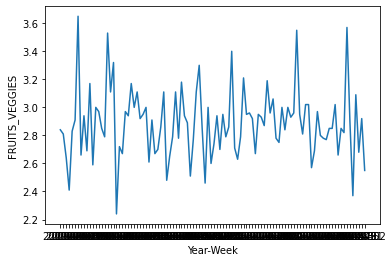

In [180]:
## HOW MANY FRUITS OR VEGETABLES DO YOU EAT EVERYDAY? (0-5)
sns.lineplot(x=final_df['Year-Week'], y=final_df['FRUITS_VEGGIES'])

<AxesSubplot:xlabel='Year-Week', ylabel='DAILY_STRESS'>

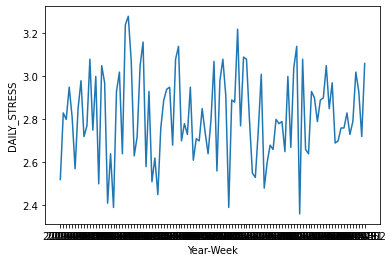

In [181]:
## HOW MUCH STRESS DO YOU TYPICALLY EXPERIENCE EVERYDAY? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['DAILY_STRESS'])

<AxesSubplot:xlabel='Year-Week', ylabel='PLACES_VISITED'>

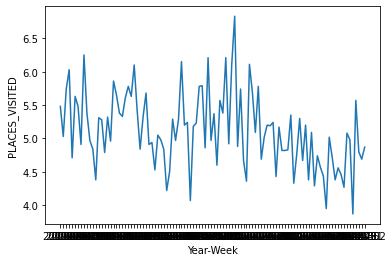

In [182]:
## HOW MANY NEW PLACES DO YOU VISIT? over 12 months(0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['PLACES_VISITED'])

<AxesSubplot:xlabel='Year-Week', ylabel='CORE_CIRCLE'>

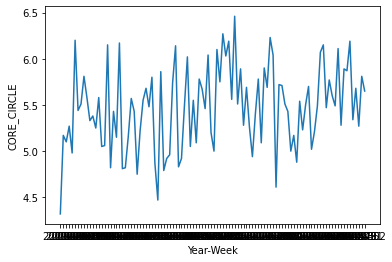

In [183]:
## HOW MANY PEOPLE ARE VERY CLOSE TO YOU? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['CORE_CIRCLE'])

<AxesSubplot:xlabel='Year-Week', ylabel='SUPPORTING_OTHERS'>

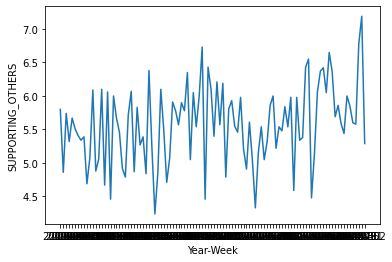

In [184]:
## HOW MANY PEOPLE DO YOU HELP ACHIEVE A BETTER LIFE? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['SUPPORTING_OTHERS'])

<AxesSubplot:xlabel='Year-Week', ylabel='SOCIAL_NETWORK'>

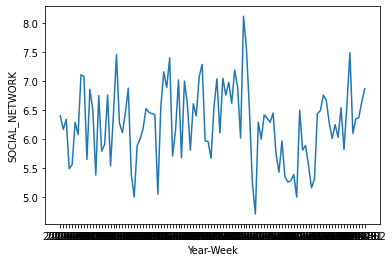

In [185]:
##WITH HOW MANY PEOPLE DO YOU INTERACT WITH DURING A TYPICAL DAY? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['SOCIAL_NETWORK'])

<AxesSubplot:xlabel='Year-Week', ylabel='ACHIEVEMENT'>

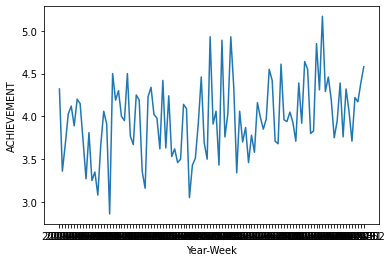

In [186]:
## HOW MANY REMARKABLE ACHIEVEMENTS ARE YOU PROUD OF? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['ACHIEVEMENT'])

<AxesSubplot:xlabel='Year-Week', ylabel='DONATION'>

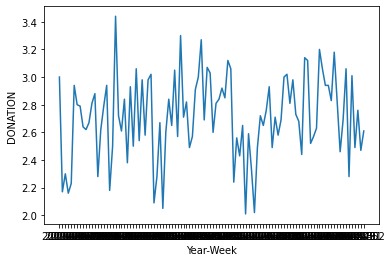

In [187]:
## HOW MANY TIMES DO YOU DONATE YOUR TIME OR MONEY TO GOOD CAUSES? last 12 months (0-5)
sns.lineplot(x=final_df['Year-Week'], y=final_df['DONATION'])

<AxesSubplot:xlabel='Year-Week', ylabel='BMI_RANGE'>

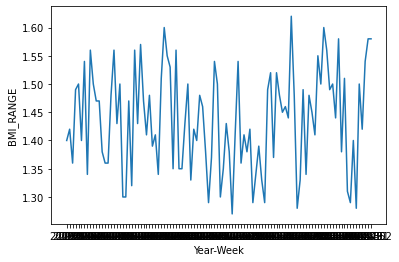

In [188]:
## WHAT IS YOUR BODY MASS INDEX (BMI) RANGE? Below 25(1 - 2)Above 25
sns.lineplot(x=final_df['Year-Week'], y=final_df['BMI_RANGE'])

<AxesSubplot:xlabel='Year-Week', ylabel='TODO_COMPLETED'>

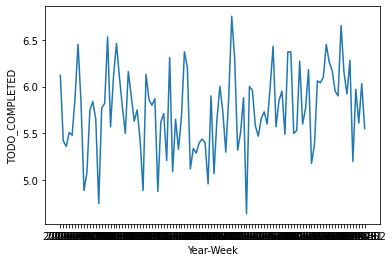

In [189]:
## HOW WELL DO YOU COMPLETE YOUR WEEKLY TO-DO LISTS? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['TODO_COMPLETED'])

<AxesSubplot:xlabel='Year-Week', ylabel='FLOW'>

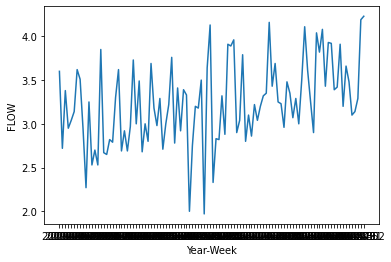

In [190]:
## IN A TYPICAL DAY, HOW MANY HOURS DO YOU EXPERIENCE "FLOW"? (0-10)
#Flow is defined as the mental state, in which you are fully immersed in performing an activity.
sns.lineplot(x=final_df['Year-Week'], y=final_df['FLOW'])

<AxesSubplot:xlabel='Year-Week', ylabel='DAILY_STEPS'>

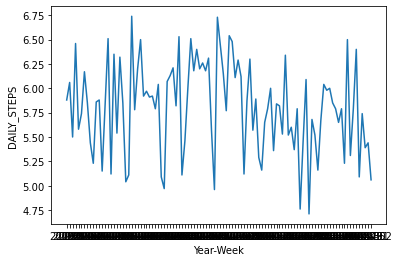

In [191]:
## HOW MANY STEPS (IN THOUSANDS) DO YOU TYPICALLY WALK EVERYDAY? (1-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['DAILY_STEPS'])

<AxesSubplot:xlabel='Year-Week', ylabel='LIVE_VISION'>

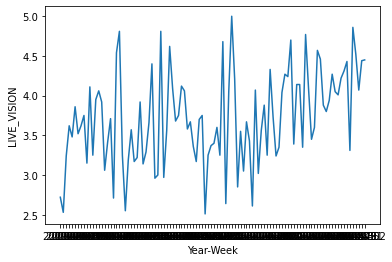

In [192]:
## FOR HOW MANY YEARS AHEAD IS YOUR LIFE VISION VERY CLEAR FOR? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['LIVE_VISION'])

<AxesSubplot:xlabel='Year-Week', ylabel='SLEEP_HOURS'>

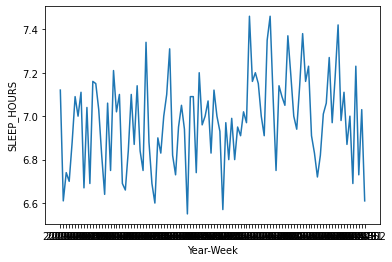

In [193]:
## ABOUT HOW LONG DO YOU TYPICALLY SLEEP? (1-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['SLEEP_HOURS'])

<AxesSubplot:xlabel='Year-Week', ylabel='LOST_VACATION'>

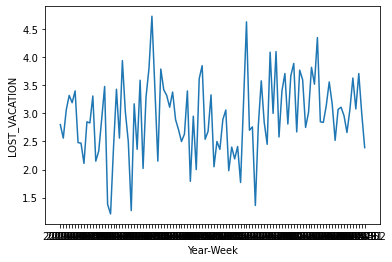

In [194]:
## HOW MANY DAYS OF VACATION DO YOU TYPICALLY LOSE EVERY YEAR ? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['LOST_VACATION'])

<AxesSubplot:xlabel='Year-Week', ylabel='DAILY_SHOUTING'>

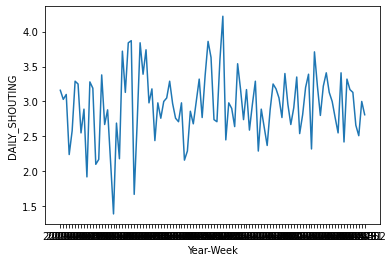

In [195]:
## HOW OFTEN DO YOU SHOUT OR SULK AT SOMEBODY? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['DAILY_SHOUTING'])

<AxesSubplot:xlabel='Year-Week', ylabel='SUFFICIENT_INCOME'>

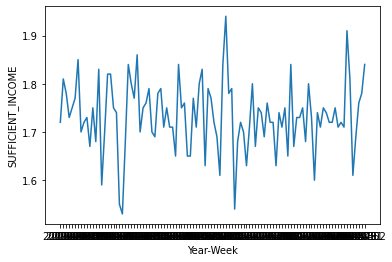

In [196]:
## HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES? Not sufficient(1-2)Sufficient
sns.lineplot(x=final_df['Year-Week'], y=final_df['SUFFICIENT_INCOME'])

<AxesSubplot:xlabel='Year-Week', ylabel='PERSONAL_AWARDS'>

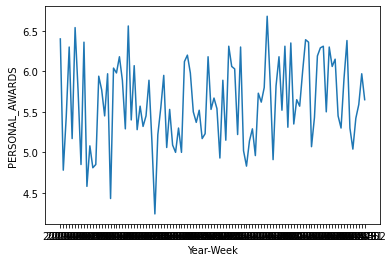

In [197]:
## HOW MANY RECOGNITIONS HAVE YOU RECEIVED IN YOUR LIFE? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['PERSONAL_AWARDS'])

<AxesSubplot:xlabel='Year-Week', ylabel='TIME_FOR_PASSION'>

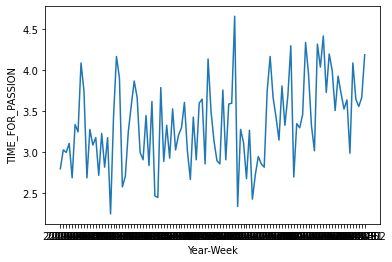

In [198]:
## HOW MANY HOURS DO YOU SPEND EVERYDAY DOING WHAT YOU ARE PASSIONATE ABOUT? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['TIME_FOR_PASSION'])

<AxesSubplot:xlabel='Year-Week', ylabel='WEEKLY_MEDITATION'>

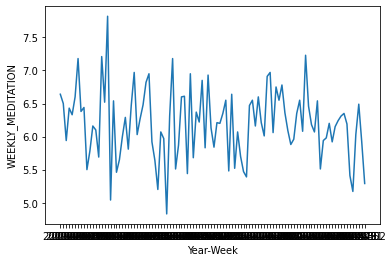

In [199]:
## IN A TYPICAL WEEK, HOW MANY TIMES DO YOU HAVE THE OPPORTUNITY TO THINK ABOUT YOURSELF? (0-10)
sns.lineplot(x=final_df['Year-Week'], y=final_df['WEEKLY_MEDITATION'])

<AxesSubplot:xlabel='Year-Week', ylabel='WORK_LIFE_BALANCE_SCORE'>

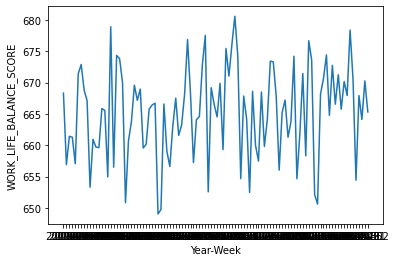

In [200]:
## Avg of a caluclated field
sns.lineplot(x=final_df['Year-Week'], y=final_df['WORK_LIFE_BALANCE_SCORE'])